In [10]:
from qcodes.instrument.base import Instrument
from labcodes.drivers.Keysight_P9373A import Keysight_P9373A

import qcodes as qc
import os
import time
from datetime import date

from qcodes.dataset.measurements import Measurement  # , DataSaver
from qcodes.dataset.plotting import plot_by_id
# , experiments, load_experiment
from qcodes.dataset.experiment_container import load_experiment_by_name, new_experiment
import matplotlib.pyplot as plt
import numpy as np

from qcodes.dataset.sqlite.database import initialise_or_create_database_at
from qcodes.dataset.experiment_container import load_or_create_experiment

In [11]:
vna_name = 'VNA_Keysight'
# this is a qcodes VisaInstrument (interface between visa and qcodes)
vna_class = Keysight_P9373A
vna_address = "TCPIP0::maip-franck::hislip0,4880::INSTR"

# -- check if instrument 'VNA' already exists. If not, create it
if Instrument.exist(vna_name, vna_class):
    # an instrument is created by qcodes in a global context,
    # from which it can be retrieved manually using find_instrument
    vna = Instrument.find_instrument(
        vna_name, vna_class)
else:
    vna = vna_class(vna_name, vna_address,
                    300e3, 13.5e9, -90, 13, 2)

exp_name = "Transmission_RoomTemp_power_sweep" # 'VNAS21_RoomTemp_power_0dB_no_fridge'
measurement_date_month = '21-01'
sample_name = 'LNOS_DL4_20Cells_100um_sample2'

In [12]:
db_path = (
    os.path.join('C:\\Users\\nanospin\\Nextcloud\\Lab-Shared\\measurements\\Data', 'experiments.db'))
qc.config["core"]["db_location"] = db_path

initialise_or_create_database_at(db_path)

In [13]:
# load_or_create_experiment(exp_name, sample_name=sample_name)
new_experiment(exp_name, sample_name=sample_name)  # sometimes load_experiment gives it the wrong name (of the previous experiment)

Transmission_RoomTemp_power_sweep#LNOS_DL4_20Cells_100um_sample2#96@C:\Users\nanospin\Nextcloud\Lab-Shared\measurements\Data\experiments.db
-------------------------------------------------------------------------------------------------------------------------------------------

### Power Sweep

In [14]:
vna.points()

4001

In [15]:
vna.trace()

'S21'

In [17]:
vna.if_bandwidth()

100.0

In [18]:
num_freq_points = 4001
vnapower = -30

start_frequency = 3.5e9
stop_frequency = 7.5e9
frequency_span = stop_frequency - start_frequency

center_frequency = (stop_frequency - start_frequency) / \
    2. + start_frequency

measuredtrace = 'S21'
ifbandwidth = 100
powersweepstart = -30
powersweepstop = 10
num_power_points = 5



# vna.sweep_mode.set('CONT')
vna.power.set(vnapower)
vna.center.set(center_frequency)
vna.span.set(frequency_span)
vna.points.set(num_freq_points)
vna.if_bandwidth.set(ifbandwidth)
vna.trace.set('S21')
vna.auto_sweep.set(False)

from qcodes import Station
station = Station()
station.add_component(vna)
meas = Measurement(station=station)

meas.register_parameter(vna.power)
meas.register_parameter(vna.real, setpoints=(vna.power,))
meas.register_parameter(vna.imaginary, setpoints=(vna.power,))
meas.register_parameter(vna.phase, setpoints=(vna.power,))
meas.register_parameter(vna.magnitude, setpoints=(vna.power,))

# -- taking data
with meas.run() as datasaver:
    for v1 in np.linspace(powersweepstart, powersweepstop, num_power_points, endpoint=True):
        vna.active_trace.set(1)

        power = vna.power.set(v1)

        print(vna.power.get())  # check

        # vna.auto_sweep.set(False)
        # vna.auto_sweep.set(True)
        # some bug not taking the last row therefore two sweeps
        vna.traces.tr1.run_sweep()

        # power=vna.power()
        # vna.auto_sweep.set(False)
        imag = vna.imaginary()
        real = vna.real()
        phase = vna.phase()
        mag = vna.magnitude()

        # vna.active_trace.set(2)
        # vna.traces.tr2.run_sweep()
        power = vna.power()  # should still be the same as a few lines above

        # time.sleep(2)
        datasaver.add_result((vna.magnitude, mag),
                             (vna.phase, phase),
                             (vna.real, real),
                             (vna.imaginary, imag),
                             (vna.power, power))

        print(vna.power.get())

# plot_by_id(datasaver.run_id)

pd = datasaver.dataset.get_parameter_data()

Starting experimental run with id: 130. 
-30.0
-30.0
-20.0
-20.0
-10.0
-10.0
0.0
0.0
10.0
10.0


([<matplotlib.axes._subplots.AxesSubplot at 0x1967212f808>,
  <matplotlib.colorbar.Colorbar at 0x1966fa88088>])

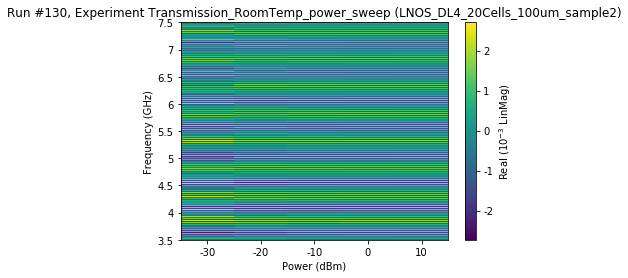

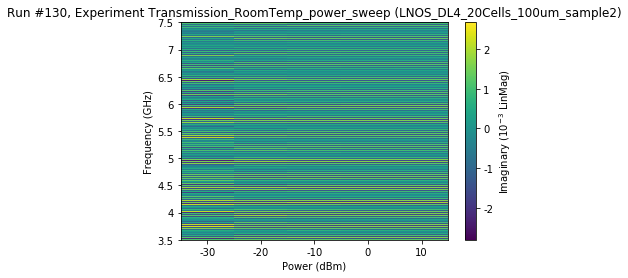

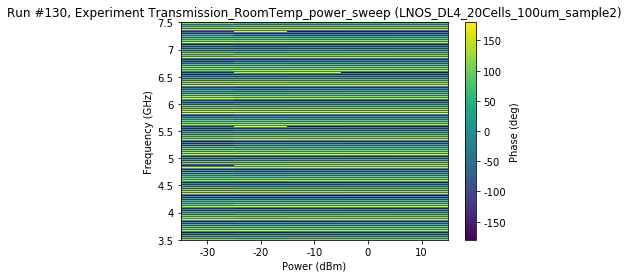

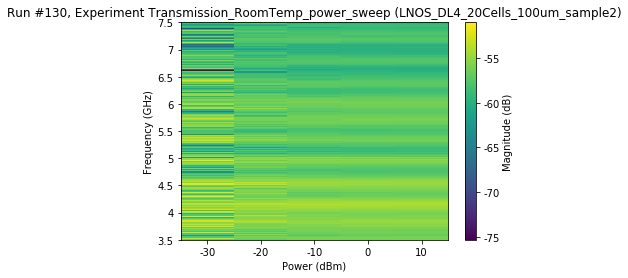

In [19]:
plot_by_id(datasaver.run_id)

In [68]:
vna.phase()

array([-18.85774612,  86.96013641, -16.89759827, ..., 175.61170959,
       -68.12759399,  90.49549866])

In [69]:
vna.format(starting_format)

([<matplotlib.axes._subplots.AxesSubplot at 0x26a2f072788>,
  <matplotlib.colorbar.Colorbar at 0x26a31589308>])

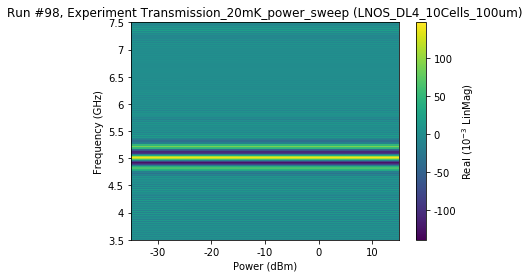

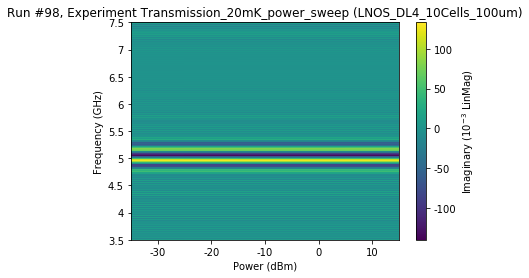

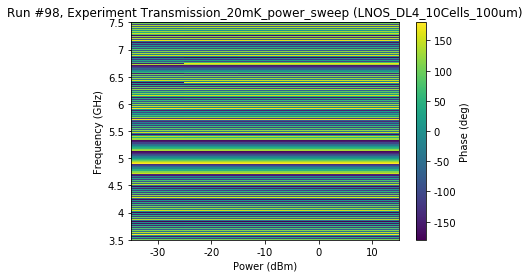

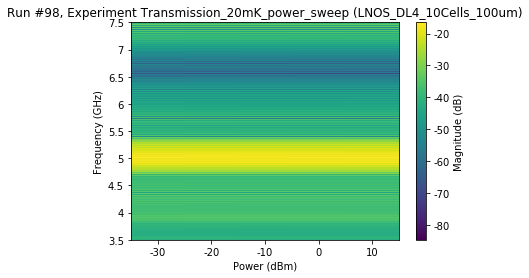

In [8]:
plot_by_id(datasaver.run_id)

In [15]:
pd

{'VNA_Keysight_tr1_imaginary': {'VNA_Keysight_tr1_imaginary': array([[-0.09939943, -0.10234587, -0.0992979 , -0.0942146 , -0.0883828 ,
          -0.08156838, -0.07480012, -0.0688125 , -0.06101009, -0.05144827,
          -0.03852879, -0.02436033, -0.00922876,  0.00788987,  0.02518366,
           0.04189457,  0.05731593,  0.06842317,  0.07581168,  0.07701371,
           0.07448666,  0.06840281,  0.06135284,  0.05408087,  0.04780185,
           0.04235005,  0.03593469,  0.0312919 ,  0.02612839,  0.01986119,
           0.01165514,  0.00159299, -0.00797162, -0.0174904 , -0.02759677,
          -0.03791585, -0.04798858, -0.05479961, -0.0603357 , -0.06191325,
          -0.05979375, -0.05351262, -0.04436432, -0.0361856 , -0.02935342,
          -0.02487879, -0.01893125, -0.0144109 , -0.0116059 , -0.00778414,
          -0.00432237,  0.00128009,  0.01055028,  0.01547579,  0.02260523,
           0.02966886,  0.04002486,  0.04824186,  0.05559032,  0.05786344,
           0.05665758,  0.05244726,  0.0

In [5]:
raw_path = (
    'C:\\Users\\nanospin\\Nextcloud\\Lab-Shared\\measurements\\Data\\' + 
    measurement_date_month + '_' + sample_name + "\\raw\\")
os.makedirs(raw_path, exist_ok=True)

In [16]:
magnitude_table = np.vstack((np.ravel(pd[vna_name + "_tr1_magnitude"][vna_name + "_power"]),
                             np.ravel(pd[vna_name + "_tr1_magnitude"][vna_name + "_tr1_frequency"]),
                             np.ravel(pd[vna_name + "_tr1_magnitude"][vna_name + "_tr1_magnitude"])))

phase_table = np.vstack((np.ravel(pd[vna_name + "_tr1_phase"][vna_name + "_power"]),
                         np.ravel(pd[vna_name + "_tr1_phase"][vna_name + "_tr1_frequency"]),
                         np.ravel(pd[vna_name + "_tr1_phase"][vna_name + "_tr1_phase"])))

real_table = np.vstack((np.ravel(pd[vna_name + "_tr1_real"][vna_name + "_power"]),
                        np.ravel(pd[vna_name + "_tr1_real"][vna_name + "_tr1_frequency"]),
                        np.ravel(pd[vna_name + "_tr1_real"][vna_name + "_tr1_real"])))

imaginary_table = np.vstack((np.ravel(pd[vna_name + "_tr1_imaginary"][vna_name + "_power"]),
                             np.ravel(pd[vna_name + "_tr1_imaginary"][vna_name + "_tr1_frequency"]),
                             np.ravel(pd[vna_name + "_tr1_imaginary"][vna_name + "_tr1_imaginary"])))

In [18]:
imaginary_table.T

array([[-3.00000000e+01,  4.00000000e+09, -9.93994325e-02],
       [-3.00000000e+01,  4.02020202e+09, -1.02345869e-01],
       [-3.00000000e+01,  4.04040404e+09, -9.92979035e-02],
       ...,
       [ 1.00000000e+01,  5.95959596e+09,  5.26319481e-02],
       [ 1.00000000e+01,  5.97979798e+09,  5.56099415e-02],
       [ 1.00000000e+01,  6.00000000e+09,  5.57284467e-02]])

In [6]:
np.savetxt(os.path.join(raw_path,
                        str(datasaver.run_id)+'_powersweep' +
                        '_'+str(exp_name)+'_magnitude.txt'),
           magnitude_table.T)

np.savetxt(os.path.join(raw_path,
                        str(datasaver.run_id)+'_powersweep'+'_' +
                        str(exp_name)+'_phase.txt'),
           phase_table.T)

np.savetxt(os.path.join(raw_path,
                        str(datasaver.run_id)+'_powersweep' +
                        '_'+str(exp_name)+'_real.txt'),
           real_table.T)

np.savetxt(os.path.join(raw_path,
                        str(datasaver.run_id)+'_powersweep' +
                        '_'+str(exp_name)+'_imaginary.txt'),
           imaginary_table.T)